# Pymaceuticals Inc.
---

### Analysis

- One observation we can make is that in general, Capomulin and Ramicane have lower volumes than Infubinol and Ceftamin treatments. From the box plots, we can see that the largest tumor volume for the first 2 treatments (about 45) is about the same as the lowest tumor volume of the other 2 treatments (excluding the outlier).

- From the line chart, we can observe that most mice treated with Capomulin has a tumor volume that decrease over time. This suggests that the treatment is working in reducing tumor volume over time.

- Finally, we can observe that average tumor volume is positively correlated with the weight of the mouse. This is a strong relationship as evident from the correlation coefficient being 0.84 (close to 1)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = total_data.duplicated(subset=["Mouse ID", "Timepoint"])
dup_id = total_data[duplicates]["Mouse ID"].values
dup_id

array(['g989', 'g989', 'g989', 'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
total_data.loc[total_data["Mouse ID"] == dup_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = total_data.loc[total_data["Mouse ID"] != dup_id[0]]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

drug_summary = pd.DataFrame({"Mean Tumor Volume":drug_group.mean(), "Median Tumor Volume":drug_group.median(),
                            "Tumor Volume Variance":drug_group.var(), "Tumor Volume Std. Dev.":drug_group.std(),
                            "Tumor Volume Std. Err.":drug_group.sem()})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_agg = drug_group.aggregate(["mean", "median", "var", "std", "sem"])
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

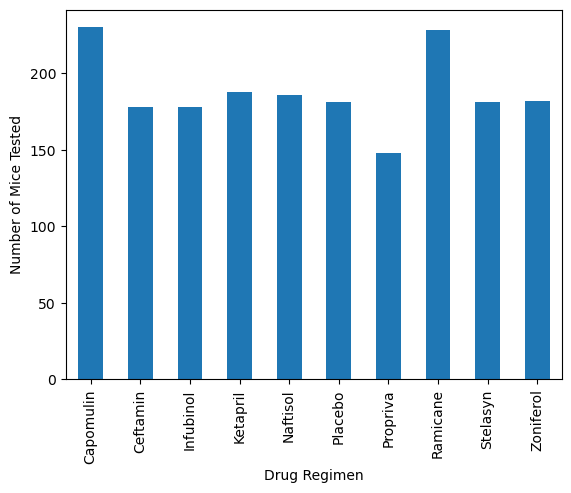

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_data.groupby("Drug Regimen")["Timepoint"].count()
timepoints.plot(kind="bar", ylabel = "Number of Mice Tested")

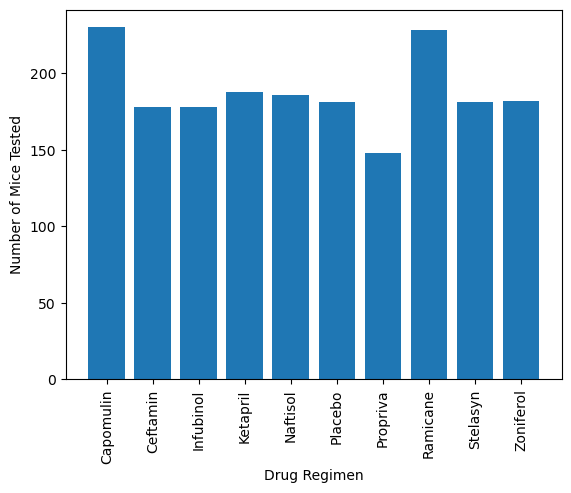

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints.index, timepoints.tolist())
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90) 
plt.show()

<AxesSubplot:ylabel='Sex'>

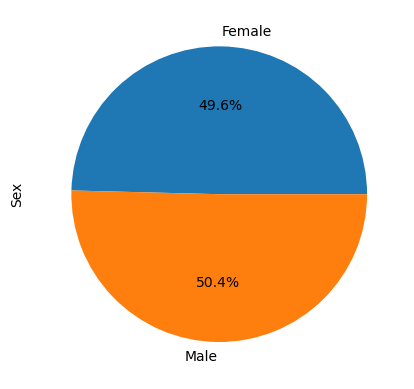

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
each_mouse = clean_data.drop_duplicates(subset=['Mouse ID'], keep='last')
each_mouse.groupby("Sex")["Sex"].count().plot(kind="pie", autopct='%1.1f%%')

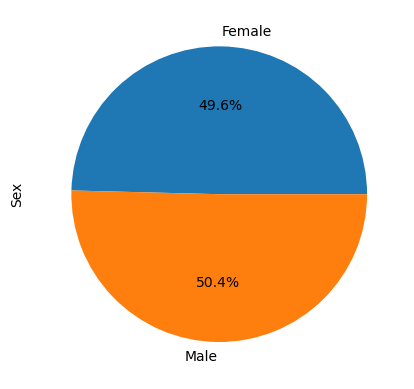

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(each_mouse.groupby("Sex")["Sex"].count(), labels=["Female", "Male"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
a = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") |
                            (clean_data["Drug Regimen"] == "Infubinol") | (clean_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
last_times = a.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(last_times, clean_data, on=["Mouse ID", "Timepoint"]).reset_index(drop=True)
final_tumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    curr_vol = final_tumor.loc[final_tumor["Drug Regimen"] == t]["Tumor Volume (mm3)"].tolist()
    volumes.append(curr_vol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quantiles = final_tumor.loc[final_tumor["Drug Regimen"] == t]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = [x for x in curr_vol if (x > upper) | (x < lower)]
            
    print(f"{t} potential outliers: {outliers}")
    

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


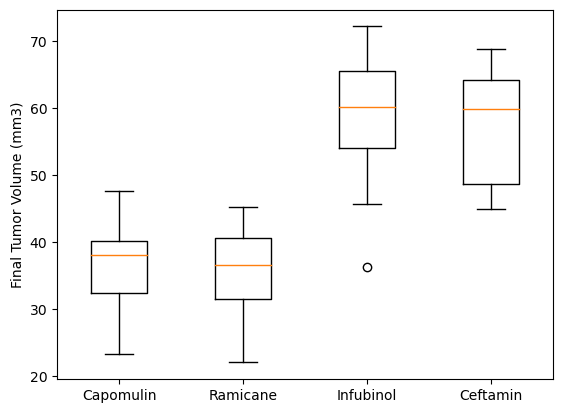

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_positions = [1,2,3,4]

plt.boxplot(volumes)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(x_positions,treatments)
plt.show()

## Line and Scatter Plots

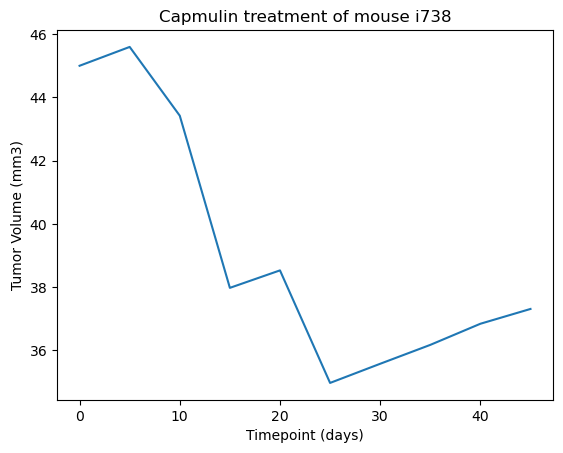

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mice = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
selected_id = capo_mice.sample(1)["Mouse ID"].values[0]
capo_mouse = capo_mice.loc[(capo_mice["Mouse ID"] == selected_id)]

plt.plot(capo_mouse["Timepoint"], capo_mouse["Tumor Volume (mm3)"])
plt.title("Capmulin treatment of mouse " + selected_id)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

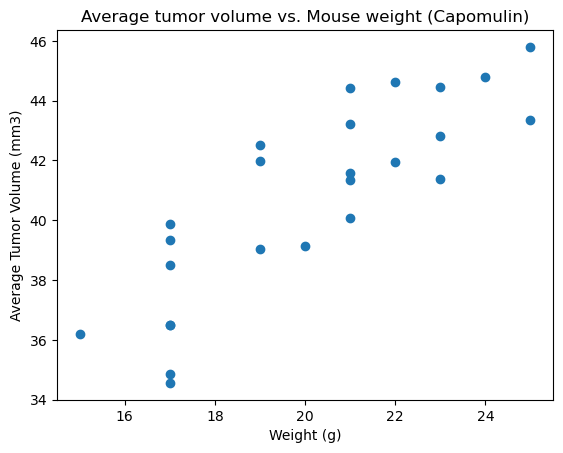

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mice = capo_mice.groupby("Mouse ID").mean()

plt.scatter(capo_mice["Weight (g)"], capo_mice["Tumor Volume (mm3)"])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average tumor volume vs. Mouse weight (Capomulin)")
plt.show()

## Correlation and Regression

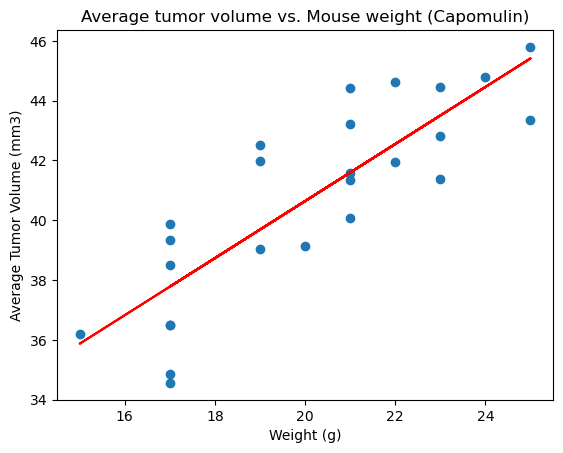

Linear Model: slope = 0.9544396890241049, intercept = 21.552160532685008
The correlation coefficient is: 0.84


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, err = st.linregress(capo_mice["Weight (g)"], capo_mice["Tumor Volume (mm3)"])
model = slope * capo_mice["Weight (g)"] + intercept

plt.scatter(capo_mice["Weight (g)"], capo_mice["Tumor Volume (mm3)"])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average tumor volume vs. Mouse weight (Capomulin)")

plt.plot(capo_mice["Weight (g)"], model, color="red")
plt.show()

correlation = round(st.pearsonr(capo_mice["Weight (g)"],capo_mice["Tumor Volume (mm3)"])[0],2)
print(f"Linear Model: slope = {slope}, intercept = {intercept}")
print("The correlation coefficient is: " + str(correlation))